In [2]:
from typing import List
import numpy as np
from vector_space_model import VectorSpaceModel

Preprocessed data was found. The system is going to use the provided indexes.
Stop words loaded successfully.
Indexes loaded successfully.
Total entires in the collection	20
14798


In [3]:
vector_space_model = VectorSpaceModel(
    documents_path="ResearchPapers",
    stop_words_file_path="Stopword-List.txt",
)
vector_space_model.initiate()

Preprocessed data was found. The system is going to use the provided indexes.
Stop words loaded successfully.
Indexes loaded successfully.
Total entires in the collection	20


1

In [4]:
import numpy as np 

X = []
doc_seq = []
for i in vector_space_model.vsm_index:
    doc_seq.append(int(i[0]))
    X.append(i[1])
y = vector_space_model.make_y(doc_seq=doc_seq)
X = np.array(X)
X

array([[0.        , 0.00322744, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02383135, 0.00515078, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0231434 , 0.01361679, 0.02465035, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00322744, 0.        , ..., 0.        , 0.        ,
        0.        ]])

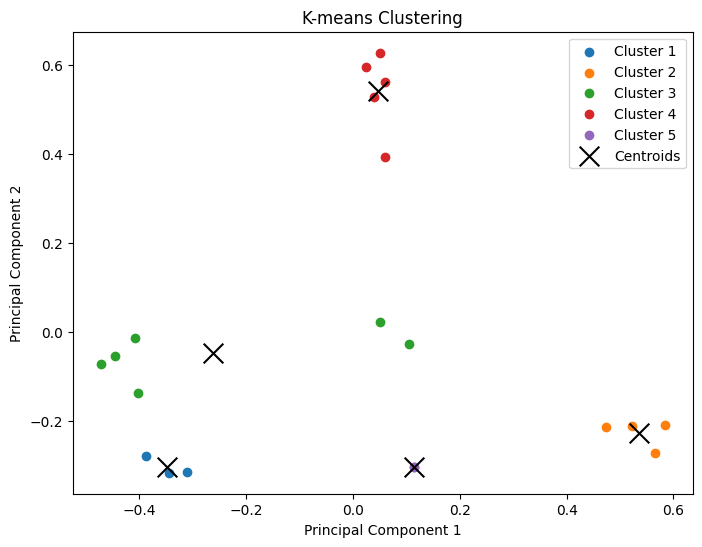

Purity: 0.85
Silhouette Score: 0.2689435906455083
Random Index: 0.12631578947368421


In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix

# Apply K-means clustering with the best K
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_


pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
centroids2D = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.scatter(data2D[labels == i, 0], data2D[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centroids2D[:, 0], centroids2D[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Evaluate clustering results
purity = 0
silhouette = silhouette_score(X, labels)
rand_index = 0

# Calculate purity
cont_matrix = contingency_matrix(y, labels)
max_in_rows = np.amax(cont_matrix, axis=0)
total_docs = np.sum(cont_matrix)
purity = np.sum(max_in_rows) / total_docs

# Calculate random index
num_same = np.sum(np.multiply(cont_matrix, cont_matrix - 1)) / 2
num_combinations = total_docs * (total_docs - 1) / 2
rand_index = (num_same / num_combinations)

print("Purity:", purity)
print("Silhouette Score:", silhouette)
print("Random Index:", rand_index)